### Clasificación de imágenes con redes neuronales
En este notebook se entrenará una red neuronal para clasificar imagenes de ropa. Para ello utilizaremos el dataset Fashion MNIST

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
#Las etiquetas de las clases son las siguientes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape, len(train_labels), train_labels, test_images.shape, len(test_labels)

((60000, 28, 28),
 60000,
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 (10000, 28, 28),
 10000)

Vemos los datos de entrenamiento. 
Tenemos 60000 imagenes de 28x28 pixeles para el entrenamiento
Tenemos 10000 imagenes de 28x28 pixeles para el test

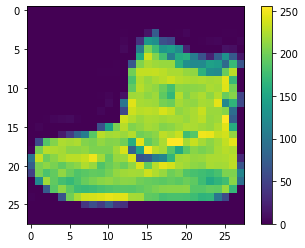

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Normalizamos los datos antes de pasarselo al modelo.

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

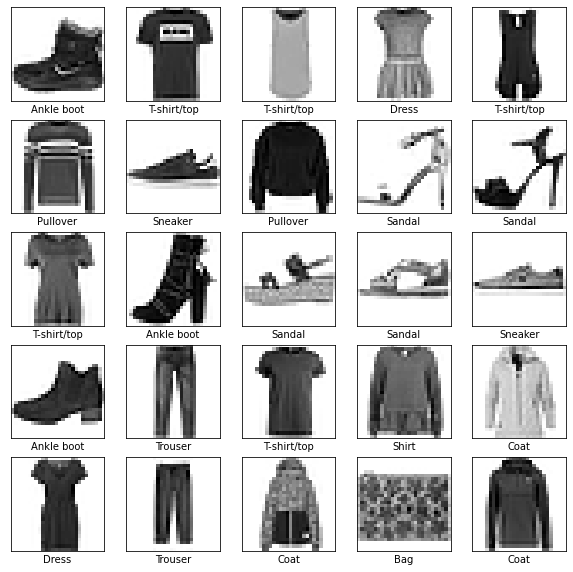

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Creación del modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imagenes de un array bi-dimensional (de 28 por 28 pixeles) a un array unidimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas `tf.keras.layers.Dense`. Estas estan completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un array de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones. Estas son agregadas durante el paso de compilacion del modelo:



*   *Loss function* — Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
*   *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

*   *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.






In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamos el modelo.

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1388 - accuracy: 0.9477
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1362 - accuracy: 0.9487
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1362 - accuracy: 0.9489
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9501
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9512
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1280 - accuracy: 0.9522
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1270 - accuracy: 0.9524
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1213 - accuracy: 0.9544
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9546
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.118

Calculamos la exactitud del modelo

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4638 - accuracy: 0.8868

Test accuracy: 0.8867999911308289


Vemos la diferencia entre la exactitud del modelo durante el entrenamiento 94% y la evaluación con las imagenes de test 88%. Esto quiere decir que nuestro modelo ha sufrido overfitting durante el entrenamiento.

In [32]:
predictions = model.predict(test_images)

In [33]:
predictions[0]

array([9.3375771e-18, 3.6644499e-20, 8.6739474e-18, 4.1614952e-22,
       1.4475995e-19, 4.7534459e-11, 2.1873482e-14, 1.8951223e-04,
       4.0762693e-17, 9.9981052e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

Calculamos las etiquetas para la matriz de confusión

In [50]:
prediction_labels = np.zeros(len(predictions))
for i in range(len(predictions)):
  prediction_labels[i] = np.argmax(predictions[i])
print(prediction_labels)

len(prediction_labels)

[9. 2. 1. ... 8. 1. 5.]


10000

In [41]:
prediction_labels

()

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

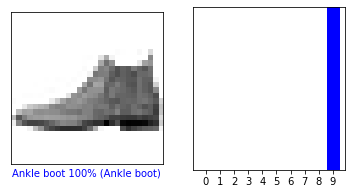

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

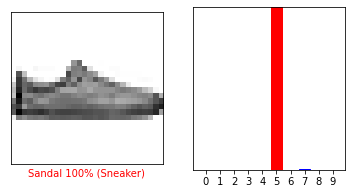

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [52]:
from sklearn import metrics

# Mostrar confusion matrix
print(metrics.confusion_matrix(test_labels, prediction_labels))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(test_labels, prediction_labels, digits=3))

[[868   3  20  18   3   1  76   0  11   0]
 [  2 982   0   8   5   0   0   1   2   0]
 [ 25   1 809   9 107   2  46   0   1   0]
 [ 27   4   9 893  38   0  22   0   7   0]
 [  1   1  81  27 862   0  23   0   5   0]
 [  0   0   0   1   0 959   0  23   3  14]
 [141   0  91  29 116   0 608   0  15   0]
 [  0   0   0   0   0  11   0 977   0  12]
 [  4   0   2   1   5   3   5   2 978   0]
 [  0   0   0   0   0   7   1  60   0 932]]
              precision    recall  f1-score   support

           0      0.813     0.868     0.839      1000
           1      0.991     0.982     0.986      1000
           2      0.799     0.809     0.804      1000
           3      0.906     0.893     0.899      1000
           4      0.759     0.862     0.807      1000
           5      0.976     0.959     0.967      1000
           6      0.778     0.608     0.683      1000
           7      0.919     0.977     0.947      1000
           8      0.957     0.978     0.967      1000
           9      0.973     

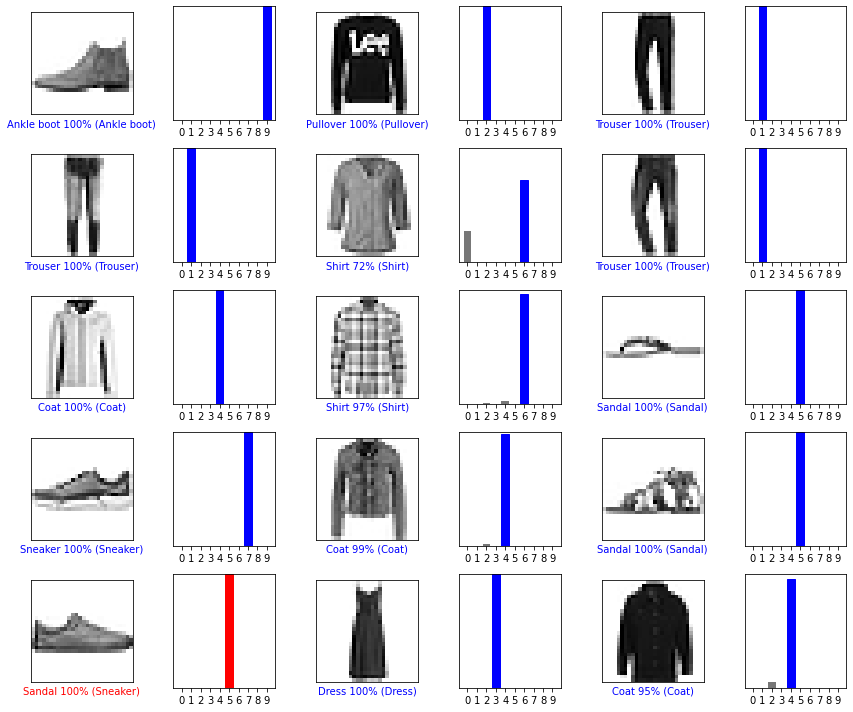

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()